<a href="https://colab.research.google.com/github/USIS015220/coolab/blob/main/Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USO de TENSORFLOW
HOLA MUNDO

In [9]:
import tensorflow as tf 
resp = tf.add(3,8).numpy()
print(resp)

11


In [10]:
#importaciones de librerias a utilizar
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


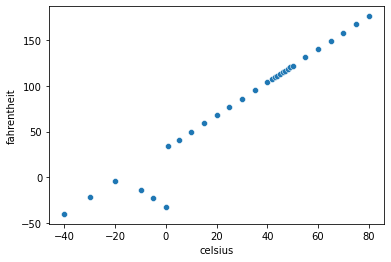

In [15]:
#obtencion de los datos de entrenamiento
temperaturas = pd.read_csv("/content/dataset.csv", sep=";")

sns.scatterplot(temperaturas["celsius"], temperaturas['fahrentheit'])
plt.show()

In [27]:
#datos de entrada y salida 
celsius = temperaturas["celsius"]
fahrentheit = temperaturas['fahrentheit']

In [42]:
#modelo de entrenamiento
modelo = tf.keras.Sequential()
modelo.add(tf.keras layers.Dense(units=1, input_shape[1]))

SyntaxError: ignored

In [34]:
#compilar el modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1),loss='mean_squared_error')

NameError: ignored

In [33]:
epocas = modelo.fit(celsius, fahrentheit, epochs=30)

NameError: ignored

In [ ]:
#evaluando el nivel de error del aprendizaje
plt.plot(epocas.history["loss"])
plt.title("progreso del aprnedizaje")
plt.xlabel("epocas")
plt.ylabel("error del aprendizaje")
plt.show()

In [ ]:
f =modelo.predict()